<a href="https://colab.research.google.com/github/carolynemacharia/Scorecard_Project/blob/main/Copy_of_credit_scorecard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install toad

In [ ]:
!pip install scikit-plot

In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import toad
from toad.plot import bin_plot,badrate_plot
from toad.metrics import KS, AUC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
import scikitplot
from scikitplot.metrics import plot_roc_curve


In [ ]:
from google.colab import files
uploaded=files.upload()
#df=pd.read_csv("C:\\Users\\cnmacharia\\Documents\\credit scorecard\\default_of_credit_card_clients.csv")

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded["UCI_Credit_Card.csv"]))

#converting the column names from uppercase to lower case
df.columns=df.columns.str.lower()
#renaming the column name from default payment next month to label
df.rename({"default.payment.next.month":"label"}, axis=1, inplace=True)
## Convert the variables from string to integer
int_cols=["id","limit_bal","age",'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','label']
for c in int_cols:
  df[c]=df[c].astype(int)

df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,label
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#import io
#df=pd.read_csv(io.BytesIO(uploaded["UCI_Credit_Card.csv"]))
## setting the first row indexed as 0 to be the column names and converting them into lower case
#df.columns=df.iloc[0, : ].str.lower()
## dropping the initial columns
#df.drop(df.index[0],inplace=True)
#Replacing hyphens in the column names
#df.columns=df.columns.str.replace("_","", regex=True)
#renaming the column name from default payment next month to label
#df.rename({"default payment next month":"label"}, axis=1, inplace=True)
## Convert the variables from string to integer
#int_cols=["id","limit_bal","age",'bill_amt1', 'bill_amt2',
   #    'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
    #   'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','label']
#for c in int_cols:
 # df[c]=df[c].astype(int)

#df.head()

In [ ]:
## Define a function target_info, when called we can get the count of the whole data together with the count of the trues and false and their corresponding proportions
## Also allows us to plot the barplot of the defaulters and those that do not default

def target_info(df_column_name):
  proportion_true=str(round(sum(df_column_name == True)/len(df_column_name),2)*100)
  proportion_false=str(round(sum(df_column_name == False)/len(df_column_name),2)*100)

  print("The total number is {} ".format(len(df_column_name)))
  print("The number of defaulters is {} ".format(sum(df_column_name == True)))
  print("The proportion of defaulters is {} ".format(proportion_true ))
  print("The number of non-defaulters is {} ".format(sum(df_column_name == False)))
  print("The proportion of non-defaulters is {} ".format(proportion_false + "%"))

  sns.barplot(x=df_column_name.value_counts().index, y=df_column_name.value_counts())
  plt.xlabel("default")
  plt.ylabel("frequency")
  return proportion_true

The total number is 30000 
The number of defaulters is 6636 
The proportion of defaulters is 22.0 
The number of non-defaulters is 23364 
The proportion of non-defaulters is 78.0% 


'22.0'

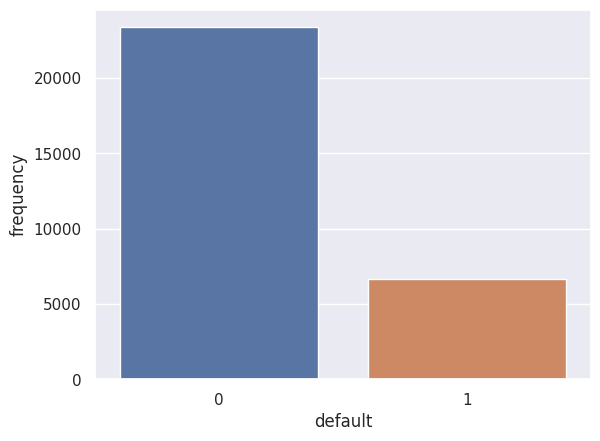

In [ ]:
target_info(df["label"])
## 22% are defaulters

#**Split the train and test set**

In [ ]:
## Split the data into training and testing set
## We won't do it randomly
## The train set will be 75% of the data and the test set will be the remaining 25%
train_set,test_set=np.split(df,[int(0.75* len(df))])
print("The shape of the train set is:{}".format(train_set.shape))
print("The shape of the test set is:{}".format(test_set.shape))

The shape of the train set is:(22500, 25)
The shape of the test set is:(7500, 25)


In [ ]:
 # the feature matrix excludes the id and label columns
#x=df.iloc[ : ,1:-1]
#y=df["label"]
#print("The shape of the features is:{}".format(x.shape))
#print("The shape of the target is:{}".format(y.shape))

In [ ]:
## Split the data into train and test without shuffling
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=False)
#print("The shape of the xtrain is:{}".format(X_train.shape))
#print("The shape of the ytrain is:{}".format(y_train.shape))
#print("The shape of the xtest is:{}".format(X_test.shape))
#print("The shape of the ytrain is:{}".format(y_test.shape))

In [ ]:
# This shows the number of missing and the cardinality of each column in the dataset
toad.detect(train_set).iloc[1:6,1:6]

,size,missing,unique,mean_or_top1,std_or_top2
limit_bal,22500,0.00%,77,163424.608000,128515.245979
sex,22500,0.00%,2,1.610178,0.487721
education,22500,0.00%,7,1.840667,0.775181
marriage,22500,0.00%,4,1.564133,0.521311
age,22500,0.00%,55,35.212889,9.307266


In [ ]:
# This helps in otputing the information value(IV) in descending oredr
toad.quality(train_set,"label",iv_only=True)

,iv,gini,entropy,unique
pay_0,0.864754,NaN,NaN,11.0
pay_2,0.536098,NaN,NaN,11.0
pay_3,0.401535,NaN,NaN,11.0
pay_4,0.349846,NaN,NaN,11.0
pay_5,0.340029,NaN,NaN,10.0
pay_6,0.282707,NaN,NaN,10.0
pay_amt1,0.189381,NaN,NaN,6592.0
limit_bal,0.171037,NaN,NaN,77.0
pay_amt2,0.168259,NaN,NaN,6476.0
pay_amt3,0.128916,NaN,NaN,6050.0


# Feature selection

In [ ]:
## Feature selection
## Drop any column with more that 90% missing
## Drop a column with an IV less than 0.02
## Drop all the columns with a correlation of 1
train_selected,dropped=toad.selection.select(train_set,target=train_set["label"],empty=0.9,iv=0.02,corr=1,return_drop=True,exclude=["id","label"])
print(
    "remaincols",train_selected.shape[1],
    "empty_cols {}".format(len(dropped["empty"])),
    "low_iv cols {}" .format(len(dropped["iv"])),
    "high_corr_cols {}".format(len(dropped["corr"]))
)

remaincols 23 empty_cols 0 low_iv cols 2 high_corr_cols 0


In [ ]:
## Output the iv table as a dataframe
def iv_table(train_selected,label_col):
  ivtable=toad.quality(train_selected,label_col,iv_only=True)
  ivtable=ivtable["iv"] ## Pick the iv column, this gives a series with the iv and the name of the corresponding variables

  return ivtable

df_ivtable=iv_table(train_selected, "label").to_frame().reset_index() ## convert froma series into a dataframe and reset the index
df_ivtable.columns=["feature_name","iv"] ## Re-label the column names
df_ivtable.head(20)


,feature_name,iv
0,pay_0,0.864754
1,pay_2,0.536098
2,pay_3,0.401535
3,pay_4,0.349846
4,pay_5,0.340029
5,pay_6,0.282707
6,pay_amt1,0.189381
7,limit_bal,0.171037
8,pay_amt2,0.168259
9,pay_amt3,0.128916



#**Feature Binning**
- This is the process of converting all the continous or discrete variables into categorical variables.
- This is done in steps:

1.   **Step 1:
Initialize:** c=toad.transform.Compiler()
2.   **Step 2:
Training binning**: c.fit(dataframe, y="target variable", method="chi", min_sample=None, n_bins=None, empty_separate=False

###Explanation on step 2
y: target variable;

method: the method to apply binning. Support 'chi' (Chi-squared), 'dt', (decisin tree), 'kmeans' (K-means), 'quantile' (by the same percentile), and 'step' (by the same step);

min_samples: can be a number or a porportion. Minimum number / porportion of samples required in each bucket;

n_bins: mininum number of buckets. If the number is too large, the algorithm will return the maxinum number of buckets it can get;

empty_separate: whether to seperate the missing values in a bucket. If False, missing values will be put along with the bucket of most close bad rate.

3. **Step 3:
Binning results:** c.export()
4. **Step 4:
Manually adjust binning:** c.update(dict)
5. **Step 5:
Apply binning results:** c.transform(dataframe, labels=False)

labels: whether to convert data to explanatory labels. Returns 0, 1, 2 … when False. Categorical features will be sorted in a descending order of porportion. Returns (-inf, 0], (0,10], (10, inf) when True.

N/B: Remember to exclude the unwanted columns mostly the id and any timestamp column






In [ ]:
## Feature binning

#Initialize
c=toad.transform.Combiner()

## Train binning
## Use the chi square method to create bins
## make sure that each bin has atleast 5% of the sample
c.fit(train_selected,y=train_selected["label"], method="chi", min_samples=0.05,exclude=["id","label"])

## Binning results
bins=c.export()
bins

{'limit_bal': [50000, 60000, 80000, 110000, 150000, 230000, 370000],
 'education': [2],
 'age': [26, 29, 34, 46],
 'pay_0': [-1, 0, 1, 2],
 'pay_2': [-1, 2],
 'pay_3': [-1, 0, 2],
 'pay_4': [-1, 0, 1],
 'pay_5': [-1, 0, 2],
 'pay_6': [-1, 0, 2],
 'bill_amt1': [2501],
 'bill_amt2': [2400, 8287, 35213],
 'bill_amt3': [2400, 7458, 81890],
 'bill_amt4': [2501],
 'bill_amt5': [2395, 8110, 35288],
 'bill_amt6': [19195, 50442],
 'pay_amt1': [6, 4902],
 'pay_amt2': [92, 1603, 4520, 15002],
 'pay_amt3': [1, 2921],
 'pay_amt4': [1, 1506, 3946],
 'pay_amt5': [1, 1880, 10000],
 'pay_amt6': [28, 480, 926, 1078, 1501, 4060, 9567]}

In [ ]:
## Apply the binning results
train_selected_bins=c.transform(train_selected, labels=False)
test_bins=c.transform(test_set[train_selected.columns], labels=False)

#**Fine Tune Bins**
- Toad provides a tool that helps in visualization to help in adjusting the bins.
- For in-sample visualization use toad.plot.bin_plot(dataframe,,x=explanatory variable of interest, target=target variable)
- When selecting the dataframe for the categorical variable it's recommended to set 'labels = True'. egtrained_set_bin=c.transform(trained_set["education", "label"], labels=True)
- The bars are the proportion of the data on each binned class, and the line is the corresponding proportion of default customers.
- For OOT visualization use toad.plot.badrate_plot(dataframe, x=time column must be in string, target=target variable,by=feature column of interest)
- Feature is preferrable if the gaps between classes get wider as time goes by  it means the binned classes have larger difference.
- No line crossing means the bin results are stable.

<Axes: xlabel='pay_0', ylabel='prop'>

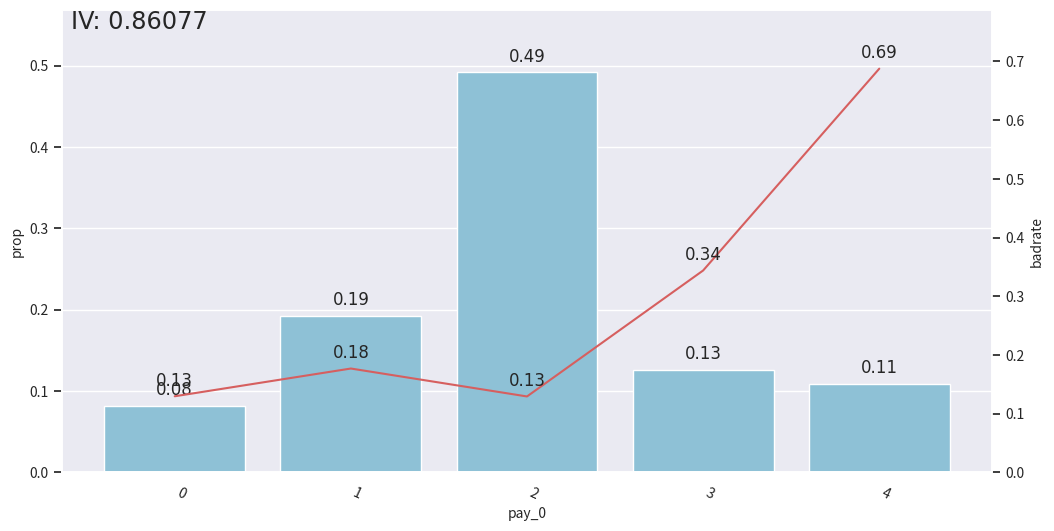

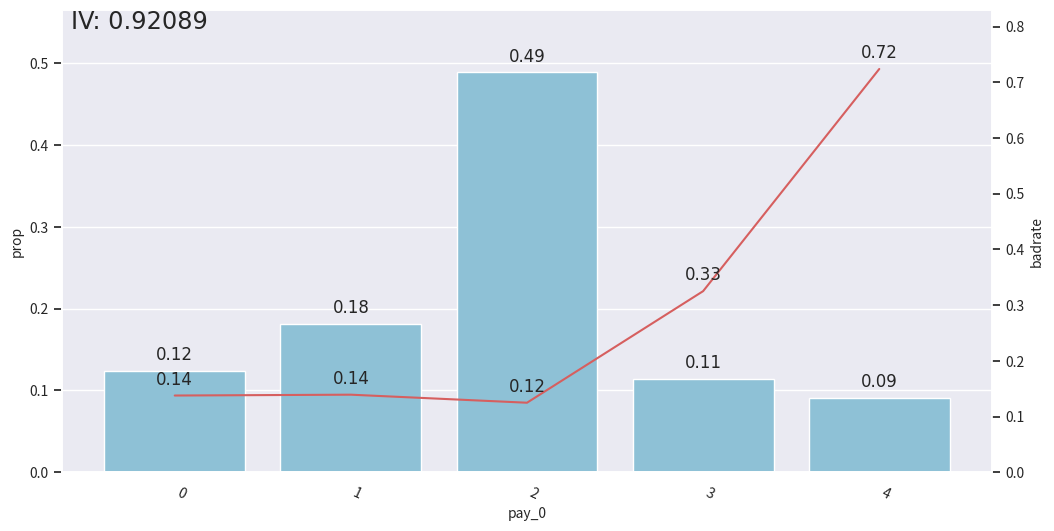

In [ ]:
## We first start with the in-sample visualization using bin_plot
## We use pay_0 (the most recent repayment status) for both the train and the test selected set
bin_plot(train_selected_bins, x="pay_0", target="label")
bin_plot(test_bins, x="pay_0", target="label")

In [ ]:
trained_t2=c.transform(train_selected[["education","label"]],labels=True)

<Axes: xlabel='education', ylabel='prop'>

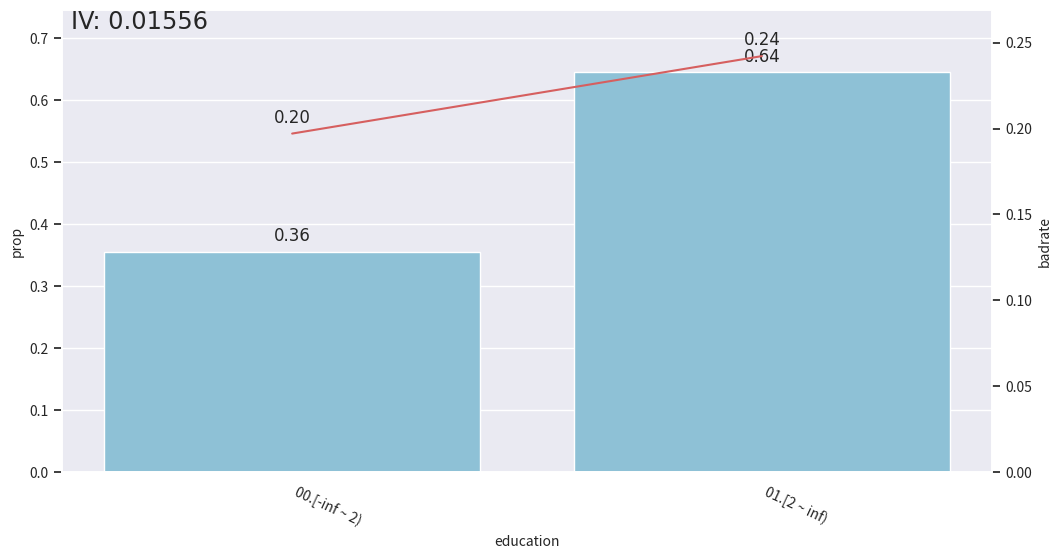

In [ ]:
bin_plot(trained_t2, x="education", target="label")
#bin_plot(test_bins, x="limit_bal", target="label")

In [ ]:
## OOT visualization
#badrate_plot(train_selected_bins, x= a timestamp variable in string format, target="label"by="pay_0")

#**Weight Of Evidence (WOE) transformation**
- WOE transformation is done after binning
- This is done in the following steps:


1. **Use the previously used combiner:** c.transform(dataframe,labels=False)
2. **Initialize the WOE transer:** transer=toad.transform.WOETransformer()
3. **Fit_transform: fit and apply WOE transformation to the in-sample data(trainset_binned)** t.fit_transform(dataframe,target=dataframe["target_variable"] ,exclude="unwanted columns and the target variable")
4. **Apply the WOE tranformation on the test / OOT data.** t.transform(dataframe).




In [ ]:
# Initialize the WOE transer
t=toad.transform.WOETransformer()

# Fit and WOE transform using the trainset
train_woe=t.fit_transform(train_selected_bins, train_selected_bins["label"], exclude=["id","label"])

# Transform using the test set
test_woe=t.transform(test_bins)

# Final data of the woe for both the train and test data
final_data_woe=pd.concat([train_woe,test_woe])
final_data_woe


,id,limit_bal,education,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,label
0,1,0.666579,0.089305,0.260122,2.019326,1.459866,-0.417692,-0.383705,-0.146267,-0.117889,...,0.028567,-0.006464,-0.034247,0.662451,0.124218,0.488240,0.454384,0.370329,0.343945,1
1,2,-0.034573,0.089305,-0.100106,-0.308111,1.459866,-0.296602,-0.230452,-0.203626,1.282897,...,-0.009878,-0.239254,-0.034247,0.662451,0.124218,0.016118,0.056559,0.370329,-0.082343,1
2,3,0.108399,0.089305,-0.028923,-0.677868,-0.408134,-0.296602,-0.230452,-0.203626,-0.201261,...,-0.009878,0.140619,-0.034247,-0.009028,0.124218,0.016118,0.056559,0.084984,-0.391680,0
3,4,0.200449,0.089305,-0.028923,-0.677868,-0.408134,-0.296602,-0.230452,-0.203626,-0.201261,...,-0.009878,0.140619,0.162673,-0.009028,-0.076968,0.016118,0.056559,0.084984,-0.119528,0
4,5,0.200449,0.089305,0.156736,-0.308111,-0.408134,-0.417692,-0.230452,-0.203626,-0.201261,...,-0.009878,0.140619,-0.034247,-0.009028,-1.078493,-0.372851,-0.457344,0.084984,0.257693,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,-0.280937,0.089305,-0.028923,-0.677868,-0.408134,-0.296602,-0.230452,-0.203626,-0.201261,...,-0.009878,0.140619,-0.034247,-0.585777,-1.078493,-0.372851,-0.106701,-0.189021,-0.119528,0
29996,29997,-0.280937,0.089305,-0.028923,-0.308111,-0.408134,-0.417692,-0.383705,-0.203626,-0.201261,...,-0.009878,-0.239254,-0.034247,-0.009028,-0.076968,-0.372851,0.056559,0.370329,0.343945,0
29997,29998,0.666579,0.089305,-0.028923,2.019326,1.459866,1.305471,-0.383705,-0.203626,-0.201261,...,-0.009878,0.140619,0.162673,0.662451,0.544785,-0.372851,-0.457344,-0.189021,-0.082343,1
29998,29999,0.108399,0.089305,-0.028923,0.583941,-0.408134,-0.296602,-0.230452,-0.203626,-0.335672,...,-0.009878,0.140619,0.162673,-0.585777,-0.076968,0.016118,-0.106701,-0.704293,-0.082343,1


#**Population stability Index (PSI)**

In [ ]:
# Selecting the columns excluding id and label columns
exclude=["id","label"]
feature_list=[feat for feat in train_woe.columns if feat not in exclude ]
# Calculate the PSI
psi_df=toad.metrics.PSI(train_woe[feature_list], test_woe[feature_list]).sort_values(ascending=False)


#**Exporting the final data**

In [ ]:
# Export the final data that has both the train and test data into a csv file
# This is saved in the current working directory
final_data_woe.to_csv("credit_scorecard_final_data.csv")

In [ ]:
## How to get the working directory
#import os
#current_directory = os.getcwd()

#**Output the final IV**

In [ ]:
## Exclude the id and label column
excluded_feat=["id","label"]
features=[feat for feat in final_data_woe.columns if feat not in excluded_feat]

In [ ]:
## iv table
df_iv=iv_table(final_data_woe[features+["label"]], "label")
df_iv=df_iv.to_frame().reset_index()
df_iv.columns=["feature","iv"]
df_iv

,feature,iv
0,pay_0,0.873565
1,pay_2,0.546857
2,pay_3,0.412420
3,pay_4,0.359289
4,pay_5,0.333734
5,pay_6,0.285164
6,limit_bal,0.181621
7,pay_amt1,0.173425
8,pay_amt2,0.162703
9,pay_amt3,0.114630


In [ ]:
# Saving the information value data
df_iv.to_csv("iv_data")

#**Model Tuning**
- We will use the logistic regression model.
- To test the model we use the Kolmogrov Smirnov Test and the AUC.
- KS test is used to test how the model is able to disctriminate between the good and bad customers.

In [ ]:
## We tune a model using Logistic Regression
def train_test_auc(x_train, y_train, x_test, y_test):

  ##Initialize the LR classifier
  lr=LogisticRegression(random_state=42, C=0.1, penalty="l2", solver="newton-cg")
  lr=LogisticRegression(class_weight="balanced")

  ## Train the model
  lr.fit(x_train, y_train)

  ## The predicted probabilities for the training data and display all the rows and only one column
  train_predict=lr.predict_proba(x_train)[:,1]

  ## use kolmogorov smirnov test for model evaluation
  print("KS_train: ",KS(train_predict, y_train))

  ## The predicted probabilities for the test data
  test_predict=lr.predict_proba(x_test)[:,1]

  ## Use the test data to evaluate the model using KS
  print("KS_Test: ",KS(test_predict, y_test))

  ## Evaluate the model using AUC
  print("AUC_train: ",AUC(train_predict, y_train))
  print("Auc_test: ",AUC(test_predict, y_test))

  ## Plot the roc curve
  #fig,ax=plt.subplots(figsize=(12,8))
  #plot_roc_curve(lr, x_test, y_test, color="blue", ax=ax)

train_test_auc(train_woe[features], train_woe["label"], test_woe[features], test_woe["label"])





KS_train:  0.40989420113649666
KS_Test:  0.4267707551887972
AUC_train:  0.7703410950501136
Auc_test:  0.7834299612229447


In [ ]:
# Use
def evaluation_metrics(label, predictions):
  tp,tn,fp,fn=confusion_matrix(label, predictions,labels=)